In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')

In [9]:
path = "../results/svm_0312-220047/"

In [11]:

for dataset in ["rcv1"]:
    df = pd.read_csv("{}/{}.csv".format(path, dataset), header=None, names=full_df.columns)
    full_df = full_df.append(df, ignore_index=True)
full_df

/var/folders/m4/7rszzss57xs8c_n79jnryrrw0000kt/T/ipykernel_86849/3375967557.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_df = full_df.append(df, ignore_index=True)


,algorithm,threads,cluster_size,converge,time,train_acc,validate_acc,test_acc,epochs,epoch_time,step_size,step_decay,update_delay,target_acc,block_size
0,HogWild,1,1,1,2.025920,0.982573,0.977226,0.977226,10,0.202592,0.5,0.8,0,0.97713,2048
1,HogWild,1,1,1,1.045310,0.982037,0.977324,0.977324,5,0.209062,0.5,0.8,0,0.97713,2048
2,HogWild,1,1,1,1.987420,0.982535,0.977176,0.977176,10,0.198742,0.5,0.8,0,0.97713,2048
3,HogWild,1,1,1,2.326720,0.982591,0.977176,0.977176,11,0.211520,0.5,0.8,0,0.97713,2048
4,HogWild,1,1,1,2.069820,0.982544,0.977226,0.977226,10,0.206982,0.5,0.8,0,0.97713,2048
5,HogWild,1,1,1,0.996045,0.981926,0.977324,0.977324,5,0.199209,0.5,0.8,0,0.97713,2048
6,HogWild,1,1,1,1.324110,0.982205,0.977275,0.977275,6,0.220686,0.5,0.8,0,0.97713,2048
7,HogWild,1,1,1,2.396070,0.982598,0.977571,0.977571,12,0.199673,0.5,0.8,0,0.97713,2048
8,HogWild,1,1,1,1.394160,0.982304,0.977423,0.977423,7,0.199166,0.5,0.8,0,0.97713,2048
9,HogWild,1,1,1,2.577470,0.982625,0.977176,0.977176,13,0.198267,0.5,0.8,0,0.97713,2048


In [33]:
groups = full_df[["threads", "cluster_size", "step_size", "step_decay", "update_delay", "target_acc"]].drop_duplicates()
nunique = groups.nunique()
groups = groups.drop(nunique[nunique == 1].index, axis=1)
groups = groups.T.drop_duplicates().T
groups = groups.drop(columns="threads")
groups

""
0
10
20
30
40


<AxesSubplot:xlabel='threads', ylabel='epochs'>

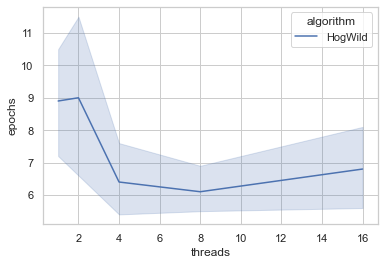

In [31]:
sns.lineplot(x="threads", y="epochs", data=full_df, hue="algorithm", ci=95)
plt.savefig("epochs")

In [12]:
df = full_df.groupby(["algorithm", "threads", "cluster_size", "step_size", "step_decay", "update_delay", "target_acc"]) \
    .agg({"converge": np.mean, "time": np.mean, "epochs": np.mean, "epoch_time": np.mean, "test_acc": np.mean,
          "validate_acc": np.mean, "train_acc": np.mean})
df

KeyError: 'name'

In [5]:
df = df.loc[df["converge"] == 1.0].drop("converge", axis=1).reset_index()
df

,name,dataset,algorithm,threads,cluster_size,step_size,step_decay,update_delay,target_acc,time,epochs,epoch_time,test_acc,validate_acc,train_acc
0,,rcv1,HogWild,1,1,0.5,0.800000,0,0.97713,1.415227,8.00000,0.176961,0.977384,0.977384,0.982330
1,,rcv1,HogWild,2,2,0.5,0.800000,0,0.97713,1.074239,6.05000,0.177355,0.977092,0.977092,0.982129
2,,rcv1,HogWild,4,4,0.5,0.800000,0,0.97713,1.140418,7.70000,0.148104,0.976964,0.976964,0.982348
3,,rcv1,HogWild,8,8,0.5,0.800000,0,0.97713,1.511452,8.06250,0.185529,0.976840,0.976840,0.982241
4,,rcv1,HogWild,16,16,0.5,0.800000,0,0.97713,2.629410,9.28125,0.282349,0.976929,0.976929,0.982394
5,,rcv1,HogWild++,2,1,0.5,0.894427,64,0.97713,1.888699,8.55000,0.219888,0.976806,0.976806,0.981598
6,,rcv1,HogWild++,4,2,0.5,0.894427,64,0.97713,0.951554,8.60000,0.110528,0.976712,0.976712,0.981794
7,,rcv1,HogWild++,8,4,0.5,0.894427,64,0.97713,1.807918,9.16250,0.196128,0.976998,0.976998,0.981986
8,,rcv1,HogWild++,16,8,0.5,0.894427,64,0.97713,2.697961,10.27500,0.264939,0.976840,0.976840,0.982114
9,,rcv1,MyWild,2,1,0.5,0.894427,64,0.97713,1.524483,7.70000,0.197709,0.976929,0.976929,0.981905


In [6]:
basic_time = df.iloc[0]["time"]
basic_epochs = df.iloc[0]["epochs"]
basic_epoch_time = df.iloc[0]["epoch_time"]
basic_time, basic_epochs, basic_epoch_time

(1.4152274999999999, 8.0, 0.1769614)

In [7]:
df["speed_up"] = basic_time / df["time"]
df["epochs_factor"] = df["epochs"] / basic_epochs
df["epoch_time_speed_up"] = basic_epoch_time / df["epoch_time"]
df = df.drop(["time", "epochs", "epoch_time"], axis=1)
df = df.drop(["target_acc", "test_acc", "validate_acc", "train_acc"], axis=1)
df

,name,dataset,algorithm,threads,cluster_size,step_size,step_decay,update_delay,speed_up,epochs_factor,epoch_time_speed_up
0,,rcv1,HogWild,1,1,0.5,0.800000,0,1.000000,1.000000,1.000000
1,,rcv1,HogWild,2,2,0.5,0.800000,0,1.317424,0.756250,0.997780
2,,rcv1,HogWild,4,4,0.5,0.800000,0,1.240972,0.962500,1.194845
3,,rcv1,HogWild,8,8,0.5,0.800000,0,0.936337,1.007812,0.953820
4,,rcv1,HogWild,16,16,0.5,0.800000,0,0.538230,1.160156,0.626746
5,,rcv1,HogWild++,2,1,0.5,0.894427,64,0.749314,1.068750,0.804779
6,,rcv1,HogWild++,4,2,0.5,0.894427,64,1.487280,1.075000,1.601051
7,,rcv1,HogWild++,8,4,0.5,0.894427,64,0.782794,1.145312,0.902276
8,,rcv1,HogWild++,16,8,0.5,0.894427,64,0.524554,1.284375,0.667934
9,,rcv1,MyWild,2,1,0.5,0.894427,64,0.928333,0.962500,0.895060
